In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [3]:
image_directory = '/content/drive/My Drive/ColabNotebooks/UNet_image_segmentation/single_class_unet_segmentation/COVID/images'
mask_directory = '/content/drive/My Drive/ColabNotebooks/UNet_image_segmentation/single_class_unet_segmentation/COVID/masks'

In [9]:
SIZE = 256
num_images = 1000

In [10]:
dir=os.chdir('/content/drive/My Drive/ColabNotebooks/UNet_image_segmentation/single_class_unet_segmentation/')
os.listdir(dir)

['dataset',
 'single_class_unet_model.hdf5',
 'single_class_unet_model1.hdf5',
 'train_smoke',
 'membrane',
 'smoke_unet_model.hdf5',
 'smoke_and_first.ipynb',
 'membrane_unet_model.hdf5',
 'Untitled0.ipynb',
 'drone_dataset',
 'COVID',
 'covid_unet.ipynb']

In [11]:
image_names = glob.glob("COVID/images/*.png")
print(image_names)
print(len(image_names))

['COVID/images/COVID-3373.png', 'COVID/images/COVID-3210.png', 'COVID/images/COVID-3329.png', 'COVID/images/COVID-3093.png', 'COVID/images/COVID-327.png', 'COVID/images/COVID-3031.png', 'COVID/images/COVID-3038.png', 'COVID/images/COVID-3163.png', 'COVID/images/COVID-3306.png', 'COVID/images/COVID-3279.png', 'COVID/images/COVID-3032.png', 'COVID/images/COVID-3026.png', 'COVID/images/COVID-3136.png', 'COVID/images/COVID-3403.png', 'COVID/images/COVID-3406.png', 'COVID/images/COVID-3165.png', 'COVID/images/COVID-3149.png', 'COVID/images/COVID-3346.png', 'COVID/images/COVID-3338.png', 'COVID/images/COVID-3061.png', 'COVID/images/COVID-3092.png', 'COVID/images/COVID-3298.png', 'COVID/images/COVID-3268.png', 'COVID/images/COVID-3293.png', 'COVID/images/COVID-3319.png', 'COVID/images/COVID-3250.png', 'COVID/images/COVID-3076.png', 'COVID/images/COVID-3171.png', 'COVID/images/COVID-319.png', 'COVID/images/COVID-3025.png', 'COVID/images/COVID-3349.png', 'COVID/images/COVID-3137.png', 'COVID/im

In [12]:
image_names.sort()
print(image_names)

['COVID/images/COVID-1.png', 'COVID/images/COVID-10.png', 'COVID/images/COVID-100.png', 'COVID/images/COVID-1000.png', 'COVID/images/COVID-1001.png', 'COVID/images/COVID-1002.png', 'COVID/images/COVID-1003.png', 'COVID/images/COVID-1004.png', 'COVID/images/COVID-1005.png', 'COVID/images/COVID-1006.png', 'COVID/images/COVID-1007.png', 'COVID/images/COVID-1008.png', 'COVID/images/COVID-1009.png', 'COVID/images/COVID-101.png', 'COVID/images/COVID-1010.png', 'COVID/images/COVID-1011.png', 'COVID/images/COVID-1012.png', 'COVID/images/COVID-1013.png', 'COVID/images/COVID-1014.png', 'COVID/images/COVID-1015.png', 'COVID/images/COVID-1016.png', 'COVID/images/COVID-1017.png', 'COVID/images/COVID-1018.png', 'COVID/images/COVID-1019.png', 'COVID/images/COVID-102.png', 'COVID/images/COVID-1020.png', 'COVID/images/COVID-1021.png', 'COVID/images/COVID-1022.png', 'COVID/images/COVID-1023.png', 'COVID/images/COVID-1024.png', 'COVID/images/COVID-1025.png', 'COVID/images/COVID-1026.png', 'COVID/images/C

In [14]:
image_names_subset = image_names[0:num_images]
print(len(image_names_subset))

1000


In [15]:
# 0 in cv.imread means read the image in grayscale format
images = [cv2.imread(img, 0) for img in image_names_subset]
# images= [cv2.imread(img, 0) for img in image_names]
for img in images:
    print(img.shape)

(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)
(299, 299)

In [23]:
# Set the desired size of the images
img_size = (256, 256)
# Load the images and resize them
images = []
for img_path in image_names_subset:
    img = cv2.imread(img_path, 0)
    img_resized = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)
    images.append(img_resized)

In [24]:
image_dataset = np.array(images)
print(image_dataset.shape)
image_dataset = np.expand_dims(image_dataset, axis = 3)

(1000, 256, 256)


In [25]:
mask_names = glob.glob("COVID/masks/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
# masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
# masks = [cv2.imread(mask, 0) for mask in mask_names]
# Set the desired size of the images
masks_size = (256, 256)
# Load the images and resize them
masks = []
for masks_path in mask_names_subset:
    msk = cv2.imread(masks_path, 0)
    masks_resized = cv2.resize(msk, masks_size, interpolation=cv2.INTER_AREA)
    masks.append(masks_resized)

mask_dataset = np.array(masks)
print(mask_dataset.shape)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

(1000, 256, 256)


In [26]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (1000, 256, 256, 1)
Mask data shape is:  (1000, 256, 256, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [ ]:
# import cv2
# import numpy as np
# # assuming the original image dataset is called `images`
# new_shape = (256, 256)

# #change masks shape
# # create a new numpy array to hold the resized images
# resized_masks = np.zeros((mask_dataset.shape[0],) + new_shape + (1,), dtype=np.float32)
# # iterate over each image and resize it to the new shape
# for i in range(mask_dataset.shape[0]):
#     resized_masks[i,:,:,0] = cv2.resize(mask_dataset[i,:,:,0], new_shape)

# #change images shape
# # create a new numpy array to hold the resized images
# resized_images = np.zeros((image_dataset.shape[0],) + new_shape + (1,), dtype=np.float32)
# # iterate over each image and resize it to the new shape
# for i in range(image_dataset.shape[0]):
#     resized_images[i,:,:,0] = cv2.resize(image_dataset[i,:,:,0], new_shape)

In [ ]:
# print("Image data shape is: ", resized_images.shape)
# print("Mask data shape is: ", resized_masks.shape)
# print("Max pixel value in image is: ", resized_images.max())
# print("Labels in the mask are : ", np.unique(resized_masks))

In [27]:
#scaler = MinMaxScaler()
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1
print("Labels in the mask are : ", np.unique(mask_dataset))

Labels in the mask are :  [0. 1.]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.1, random_state = 42)

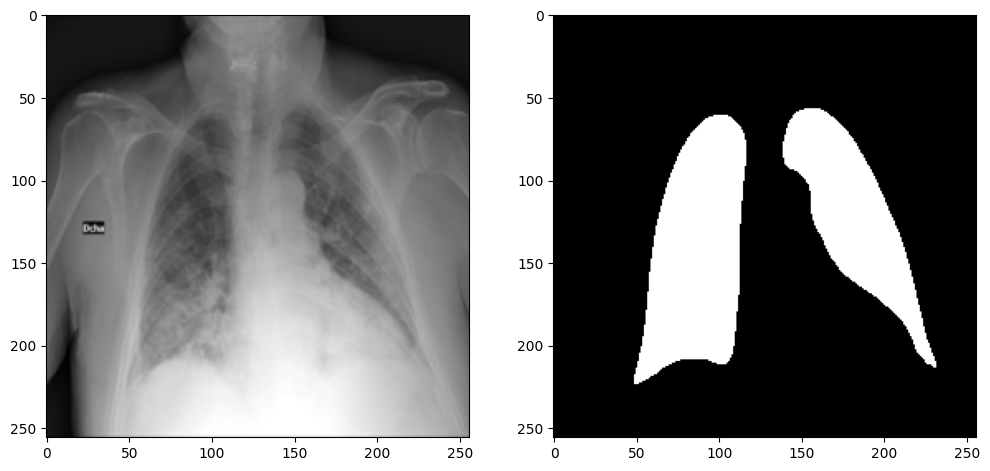

In [29]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [30]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

In [31]:
#Encoder block: Conv block followed by maxpooling
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation
def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [32]:
#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [33]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [34]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [35]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/10
57/57 [==============================] - 91s 972ms/step - loss: 0.2795 - accuracy: 0.8835 - val_loss: 83.4361 - val_accuracy: 0.2669
Epoch 2/10
57/57 [==============================] - 46s 812ms/step - loss: 0.1523 - accuracy: 0.9420 - val_loss: 1.5997 - val_accuracy: 0.7908
Epoch 3/10
57/57 [==============================] - 48s 843ms/step - loss: 0.1058 - accuracy: 0.9604 - val_loss: 1.1525 - val_accuracy: 0.7400
Epoch 4/10
57/57 [==============================] - 50s 870ms/step - loss: 0.0852 - accuracy: 0.9675 - val_loss: 0.4269 - val_accuracy: 0.8049
Epoch 5/10
57/57 [==============================] - 49s 862ms/step - loss: 0.0685 - accuracy: 0.9736 - val_loss: 0.3507 - val_accuracy: 0.8321
Epoch 6/10
57/57 [==============================] - 48s 851ms/step - loss: 0.0636 - accuracy: 0.9755 - val_loss: 0.3149 - val_accuracy: 0.8794
Epoch 7/10
57/57 [==============================] - 49s 866ms/step - loss: 0.0666 - accuracy: 0.9743 - val_loss: 0.1420 - val_accuracy: 0.942

In [36]:
#Save the model for future use
model.save('/content/drive/My Drive/ColabNotebooks/UNet_image_segmentation/single_class_unet_segmentation/covid_unet_model.hdf5')

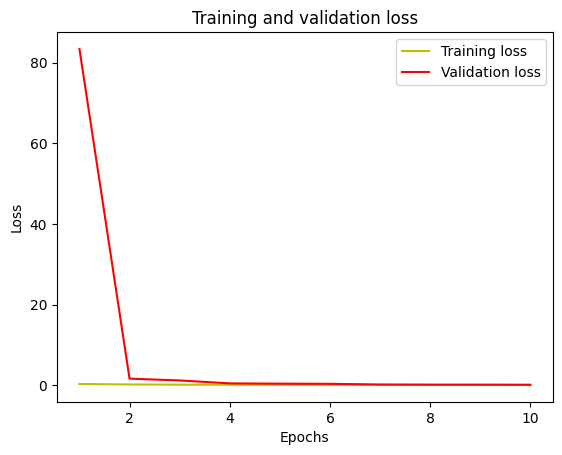

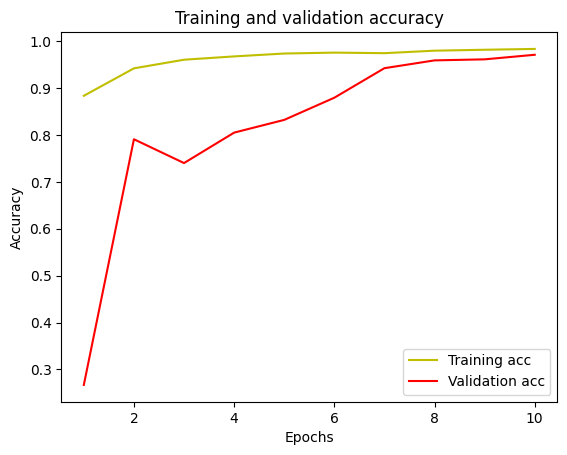

In [37]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
#Load previously saved model
from keras.models import load_model
model = load_model("covid_unet_model.hdf5", compile=False)

In [39]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

4/4 [==============================] - 18s 359ms/step


In [40]:
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.9274205


(1, 256, 256, 1)
1/1 [==============================] - 2s 2s/step
(256, 256)


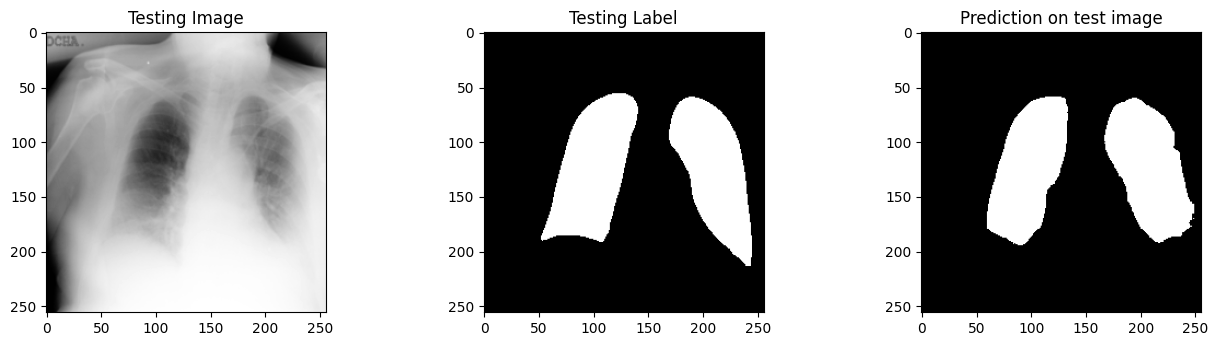

In [41]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()